Archivo guardado en:C:/Users/LENOVO/OneDrive/Documentos/Estadisticas/Estadisticas Coordinadoras/Coor_Priscila/Archivo y Gráfico/estadisticas_TalkingTime_Priscila.csv


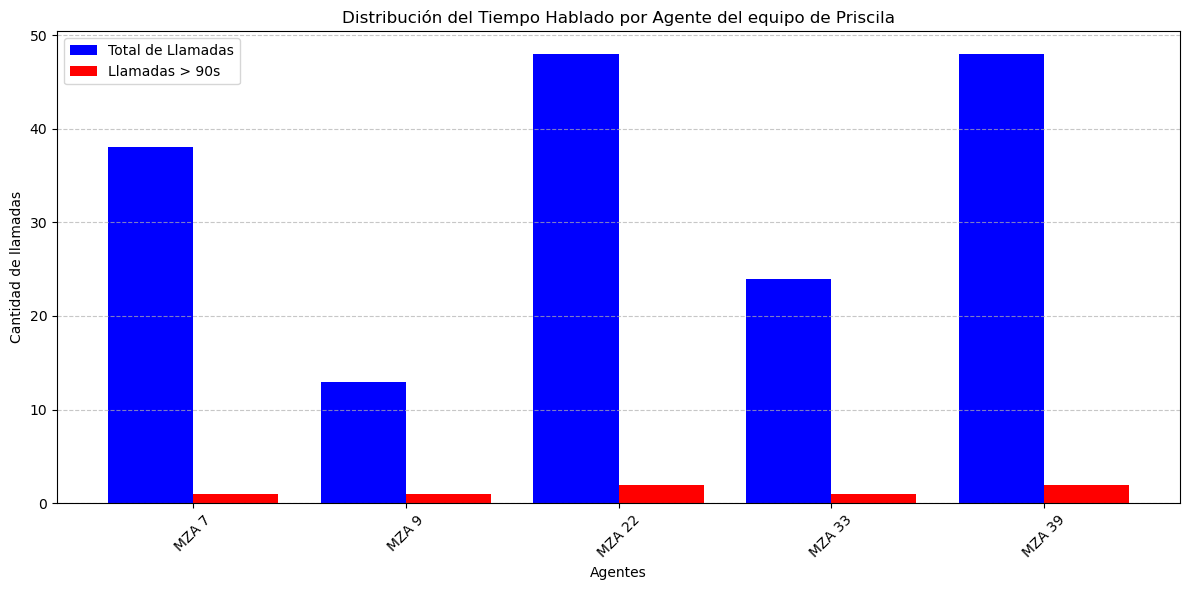

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import time
import os
import numpy as np
%matplotlib inline
# Estadísticas talkingTime tiempo hablado minuto y medio, se anota el talkingTime por usuario después poner la cantidad de llamada que superar el minuto y medio, y la llamada que más tiempo duro, un excel de eso, y un gráfico.

ruta="C:/Users/LENOVO/OneDrive/Documentos/Estadisticas/Detalle Interacciones (Campaña - Lote).csv"
df=pd.read_csv(ruta,sep=';',encoding='utf-8',on_bad_lines='skip')

df['Nombre Agente'].unique()

agentes_priscila=['MZA 7','MZA 9','MZA 22','MZA 33','MZA 39']

# filtrar solo los datos de estos agentes
df_priscila=df[df['Nombre Agente'].isin(agentes_priscila)]
estadisticas_priscila=[]

# Calcular métricas por agente
for agente in agentes_priscila:
    df_agente=df_priscila[df_priscila['Nombre Agente']==agente]
     
    # Total de llamadas
    total_llamadas=df_agente.shape[0]
    # Minuto y medio superado
    llamadas_mas_90s=df_agente[df_agente['TalkingTime']>90].shape[0]
    # Máximo de TalkingTIme
    max_tiempo=df_agente['TalkingTime'].max() if not df_agente.empty else 0
    
    estadisticas_priscila.append(
        {"Agente":agente,
         "Total Llamadas":total_llamadas,
         "Llamadas > 90s":llamadas_mas_90s,
         "Máximo TalkingTime (s)":max_tiempo}
    )
df_estadisticas_priscila=pd.DataFrame(estadisticas_priscila)
    
ruta_de_archivo="C:/Users/LENOVO/OneDrive/Documentos/Estadisticas/Estadisticas Coordinadoras/Coor_Priscila/Archivo y Gráfico/estadisticas_TalkingTime_Priscila.csv"
df_estadisticas_priscila.to_csv(ruta_de_archivo,index=False)

print(f'Archivo guardado en:{ruta_de_archivo}')


# Creamos el gráfico
width = 0.4
x = np.arange(len(agentes_priscila))  # Crear un arreglo con las posiciones en el eje X
total_llamadas = df_estadisticas_priscila['Total Llamadas']
llamadas_mas_90s = df_estadisticas_priscila['Llamadas > 90s']

plt.figure(figsize=(12,6))
plt.bar(x - width/2, total_llamadas, width=width, color='blue', label='Total de Llamadas')
plt.bar(x + width/2, llamadas_mas_90s, width=width, color='red', label='Llamadas > 90s')

# Personalizar el gráfico
plt.title('Distribución del Tiempo Hablado por Agente del equipo de Priscila')
plt.xlabel('Agentes')
plt.ylabel('Cantidad de llamadas')
plt.xticks(x, agentes_priscila, rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Guardar el gráfico
plt.savefig('C:/Users/LENOVO/OneDrive/Documentos/Estadisticas/Estadisticas Coordinadoras/Coor_Priscila/Archivo y Gráfico/grafico_TalkingTime_Coor_Priscila.png');

